<a href="https://colab.research.google.com/github/akhilnazim0/Data-Science-Project/blob/main/Data_Science_Project_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#import common modules for data analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy as sc
import sklearn as sk
import seaborn as sns


In [3]:
#read data as dataframe
df = pd.read_csv('/content/drive/MyDrive/Data science project/diabetes_012_health_indicators_BRFSS2015.csv')

 diabetes _ 012 _ health _ indicators _ BRFSS2015.csv is a clean dataset of 253,680 survey responses to the CDC's BRFSS2015. The target variable Diabetes_012 has 3 classes. 0 is for no diabetes or only during pregnancy, 1 is for prediabetes, and 2 is for diabetes. There is class imbalance in this dataset. This dataset has 21 feature variables


*   **Diabetes**_012 is 0 = no diabetes 1 = prediabetes 2 = diabetes
*   **HighBP** is 0 = no high BP 1 = high BP
*  **HighChol** is 0 = no high cholesterol 1 = high cholesterol
*  **CholCHeck** is 0 = no cholesterol check in 5 years 1 = yes cholesterol check in 5 years
*   **Smoker** is Have you smoked at least 100 cigarettes in your entire life? [Note: 5 packs = 100 cigarettes] 0 = no 1 = yes
*   **Stroke** is (Ever told) you had a stroke. 0 = no 1 = yes
*   **HeartDiseaseorAttack** is coronary heart disease (CHD) or myocardial infarction (MI) 0 = no 1 = yes
*   **PhysActivity** is physical activity in past 30 days - not including job 0 = no 1 = yes
*   **Fruits** is Consume Fruit 1 or more times per day 0 = no 1 = yes
*   **Age** is 13-level age category (_AGEG5YR see codebook) 1 = 18-24 , 9 = 60-64 , 13 = 80 or older


In [4]:
#what does dataframe look like?
df.head()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [5]:
#To see the dimensions
df.shape


(253680, 22)

In [6]:
#What are the datatype of the columns
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_012          253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

In [7]:
#Basic Descriptive
pd.set_option('display.float_format', lambda x: '% 3.f' % x)
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Diabetes_012,253680,0,1,0,0,0,0,2
HighBP,253680,0,0,0,0,0,1,1
HighChol,253680,0,0,0,0,0,1,1
CholCheck,253680,1,0,0,1,1,1,1
BMI,253680,28,7,12,24,27,31,98
Smoker,253680,0,0,0,0,0,1,1
Stroke,253680,0,0,0,0,0,0,1
HeartDiseaseorAttack,253680,0,0,0,0,0,0,1
PhysActivity,253680,1,0,0,1,1,1,1
Fruits,253680,1,0,0,0,1,1,1


In [8]:
#Tlo find any missing values in dataframe
print(f'The null values in the dataset are\n{df.isna().sum()}')

The null values in the dataset are
Diabetes_012            0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64


**2. FILTERING**

In [9]:
#Delete/Remove unwanted columns or not usefull to the model
df_f = df.drop(['Income','Education'],axis=1, )
df_f.shape

(253680, 20)

In [10]:
#finding missing value
df_f.isnull()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253675,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
253676,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
253677,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
253678,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [11]:
#To find which column is missing value or what is the extent of missingness
df_f.isnull().sum()*100/len(df_f)

Diabetes_012             0
HighBP                   0
HighChol                 0
CholCheck                0
BMI                      0
Smoker                   0
Stroke                   0
HeartDiseaseorAttack     0
PhysActivity             0
Fruits                   0
Veggies                  0
HvyAlcoholConsump        0
AnyHealthcare            0
NoDocbcCost              0
GenHlth                  0
MentHlth                 0
PhysHlth                 0
DiffWalk                 0
Sex                      0
Age                      0
dtype: float64

This means there is no missing value in the columns

In [12]:
#how to check for row Duplication
df_f.duplicated().sum()

59165

In [13]:
#To see the Duplicate rows
df_f.loc[df_f.duplicated(), :]

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age
1242,2,1,1,1,27,1,0,0,0,0,1,0,1,0,5,0,30,1,0,10
1528,0,0,1,1,23,0,0,0,1,1,1,0,1,0,1,0,0,0,0,11
1563,0,0,0,1,21,1,0,0,1,1,1,0,1,0,1,0,0,0,0,4
1619,0,0,0,1,27,0,0,0,1,0,1,0,1,0,2,0,0,0,0,10
1768,0,0,0,1,26,0,0,0,1,1,1,0,1,0,1,0,0,0,0,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253655,0,0,0,1,28,0,0,0,1,1,1,0,1,0,2,0,0,0,0,2
253656,0,0,0,1,25,0,0,0,1,1,1,1,1,0,1,0,0,0,0,4
253672,0,1,0,1,30,1,0,1,1,1,1,0,1,0,3,0,0,0,1,12
253674,0,0,0,1,27,0,0,0,0,0,1,0,1,0,1,0,0,0,0,3


In [14]:
#locating duplicate rows
df_f.loc[df_f.duplicated(keep='last'), :]

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age
3,0,1,0,1,27,0,0,0,1,1,1,0,1,0,2,0,0,0,0,11
5,0,1,1,1,25,1,0,0,1,1,1,0,1,0,2,0,2,0,1,10
10,2,0,0,1,25,1,0,0,1,1,1,0,1,0,3,0,0,0,1,13
16,0,1,1,1,21,0,0,0,1,1,1,0,1,0,3,0,0,0,0,10
25,0,0,0,1,32,0,0,0,1,1,1,0,1,0,2,0,0,0,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
252562,0,1,0,1,26,0,0,0,1,1,1,0,1,0,1,0,0,0,0,3
252635,0,0,0,1,21,0,0,0,1,0,1,0,1,0,1,0,0,0,1,1
252671,0,0,0,1,23,0,0,0,1,1,1,0,1,0,1,0,0,0,0,3
252734,0,0,1,1,26,0,0,0,0,0,1,0,1,0,3,0,0,0,0,12


In [15]:
#Remove Duplicate rows
df_f.drop_duplicates(keep='last').shape

(194515, 20)

In [16]:
df_f['Age'].unique()

array([ 9.,  7., 11., 10.,  8., 13.,  4.,  6.,  2., 12.,  5.,  1.,  3.])

In [21]:
# Define the mapping dictionary for age categories
age_category_map = {
    1: 'Young adults',
    2: 'Young adults',
    3: 'Adults',
    5: 'Adults',
    6: 'Adults',
    7: 'Middle-aged',
    8: 'Middle-aged',
    9: 'Middle-aged',
    10: 'Old',
    11: 'Old',
    12: 'Old',
    13: 'Old'
}

#the age codes to age categories
df_f['Age_Category'] = df_f['Age'].map(age_category_map)

# Display the updated DataFrame
print(df_f)

        Diabetes_012  HighBP  HighChol  CholCheck  BMI  Smoker  Stroke  \
0                  0       1         1          1   40       1       0   
1                  0       0         0          0   25       1       0   
2                  0       1         1          1   28       0       0   
3                  0       1         0          1   27       0       0   
4                  0       1         1          1   24       0       0   
...              ...     ...       ...        ...  ...     ...     ...   
253675             0       1         1          1   45       0       0   
253676             2       1         1          1   18       0       0   
253677             0       0         0          1   28       0       0   
253678             0       1         0          1   23       0       0   
253679             2       1         1          1   25       0       0   

        HeartDiseaseorAttack  PhysActivity  Fruits  ...  AnyHealthcare  \
0                          0         

<Axes: xlabel='Age Category'>

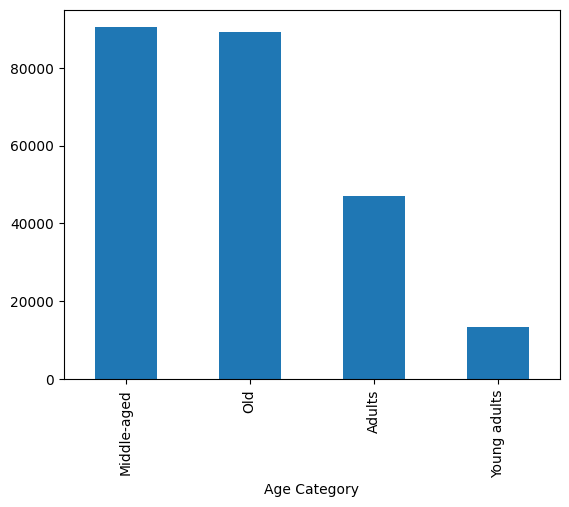

In [23]:
df_f['Age Category'].value_counts().plot(kind='bar')